# Multiple Linear Regression

## Bike Sharing Assignment

### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1: Data Understanding, Preparation and EDA

In [3]:
bikes = pd.read_csv('day.csv')

In [4]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikes.shape

(730, 16)

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes.describe() #statistical data of numerical variables

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [9]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Drop insignificant variables

In [10]:
# listing all columns names

bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
# Dropping instant column as its an index and has no significance to target variable
bikes.drop(['instant'], axis=1, inplace=True)

# Dropping dteday column as date when bikes hired, have a no contribution for linear regression
bikes.drop(['dteday'], axis=1, inplace=True)

# As per data_dict, cnt columns is sum of casual and registered, hence dropping both columns. 
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

In [12]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikes.shape

(730, 12)

### Convert feature values into categorical string values

#### Lets convert season variable first, into categorical string values.
#### As per Data Dictionary, season : ***season (1:spring, 2:summer, 3:fall, 4:winter)***

In [14]:
bikes['season'] = bikes['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikes['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

#### Next, Lets convert, mnt column to categorical string values,

#### As per Data Dictionary, ***mnth : month ( 1 to 12)***

In [15]:
bikes['mnth'] = bikes['mnth'].map({1:'jan', 2:'feb', 3:'march', 4:'april', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})


In [16]:
bikes['mnth'].value_counts()

mnth
jan      62
march    62
may      62
july     62
aug      62
oct      62
dec      62
april    60
june     60
sep      60
nov      60
feb      56
Name: count, dtype: int64

#### Next, lets convet weathersit to categorical string values
#### As per Data Dictionary, 
***weathersit : <br>
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog***

In [17]:
bikes['weathersit'] = bikes['weathersit'].map({1:'clear', 2:'mist', 3:'light', 4:'heavy'})

bikes['weathersit'].value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

In [18]:

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Next, lets convert weekday to categorical string variable

#### As per Data Dictionary, ***weekday : day of the week***

In [19]:
bikes['weekday'] = bikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})


In [20]:
bikes['weekday'].value_counts()

weekday
Sat    105
Sun    105
Mon    105
Tue    104
Thu    104
Fri    104
Wed    103
Name: count, dtype: int64

In [21]:
bikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,Thu,1,mist,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,Fri,1,mist,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,Sat,0,mist,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,Sun,0,clear,10.489153,11.58500,48.3333,23.500518,1796


## Step 2: Visualising the Data

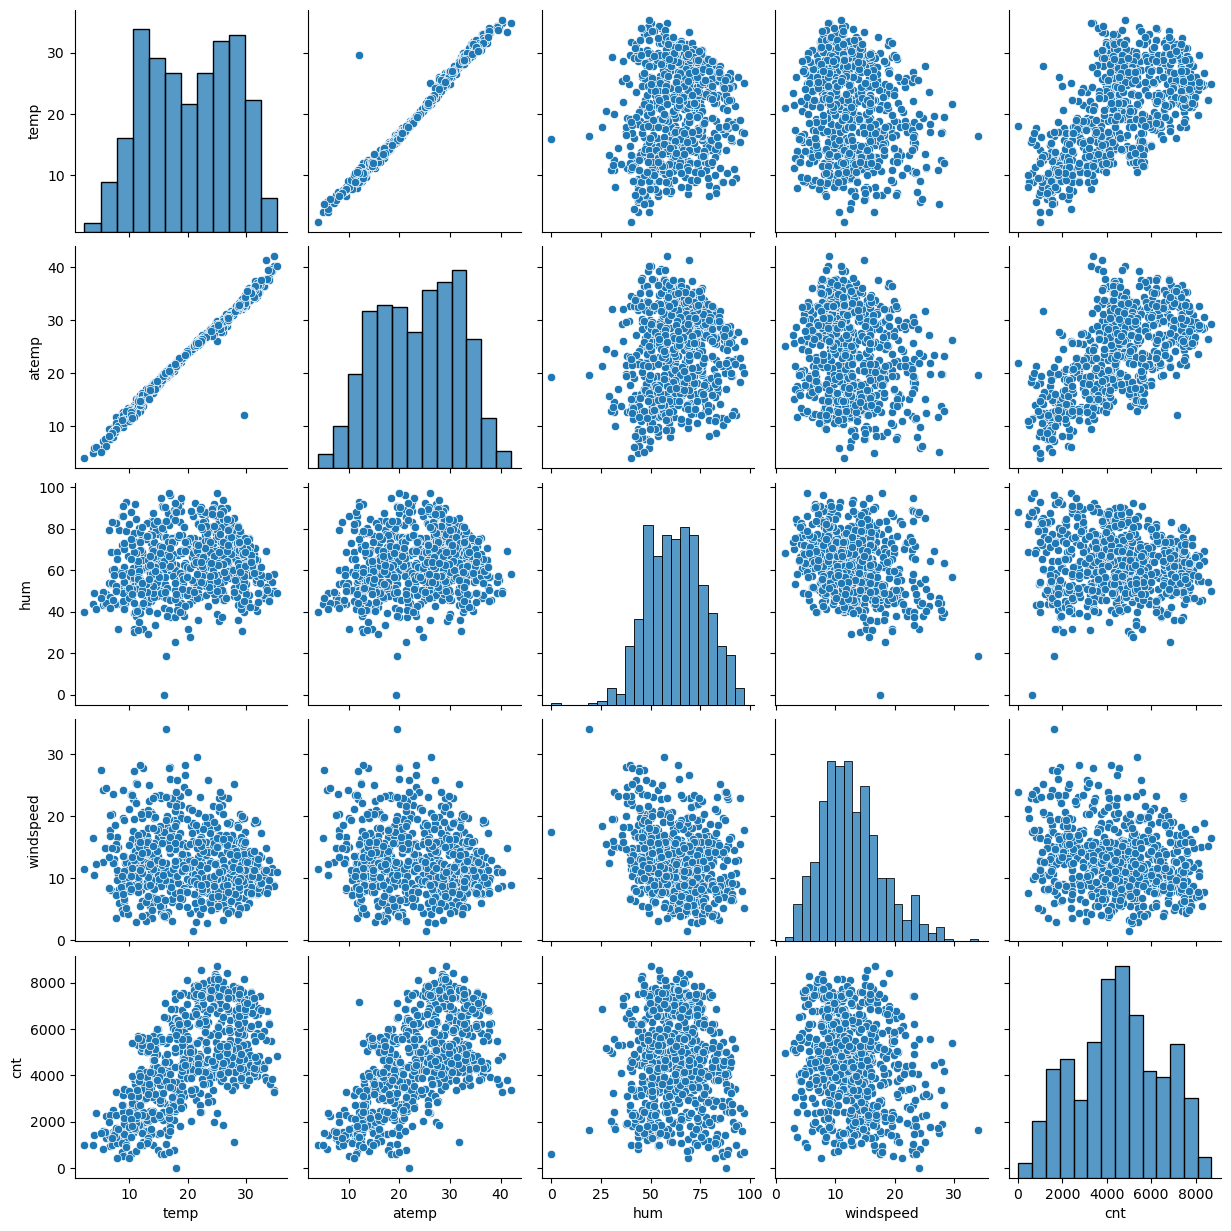

In [22]:
#Visualizing numerice variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

sns.pairplot(bikes[num_vars])
plt.show()

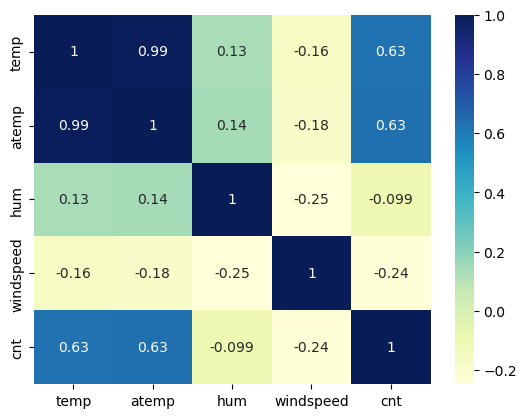

In [23]:
#Applying Heatmap to visualize the correlation among numberic variables

sns.heatmap(bikes[num_vars].corr(),cmap="YlGnBu",annot=True)
plt.show()

Inferences:
- There are three significant numerical varibles i.e **'yr','temp', 'atemp**, have high correlation with target variable **'cnt'**.
- To address multicollinearity, variables like **'temp' & 'atemp'** are highly correlated with each other, and hence we need to drop one of columns.

In [24]:
#'tmp' makes more sensible that 'atemp', hence dropping 'atemp'

bikes.drop(['atemp'], axis = 1, inplace = True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


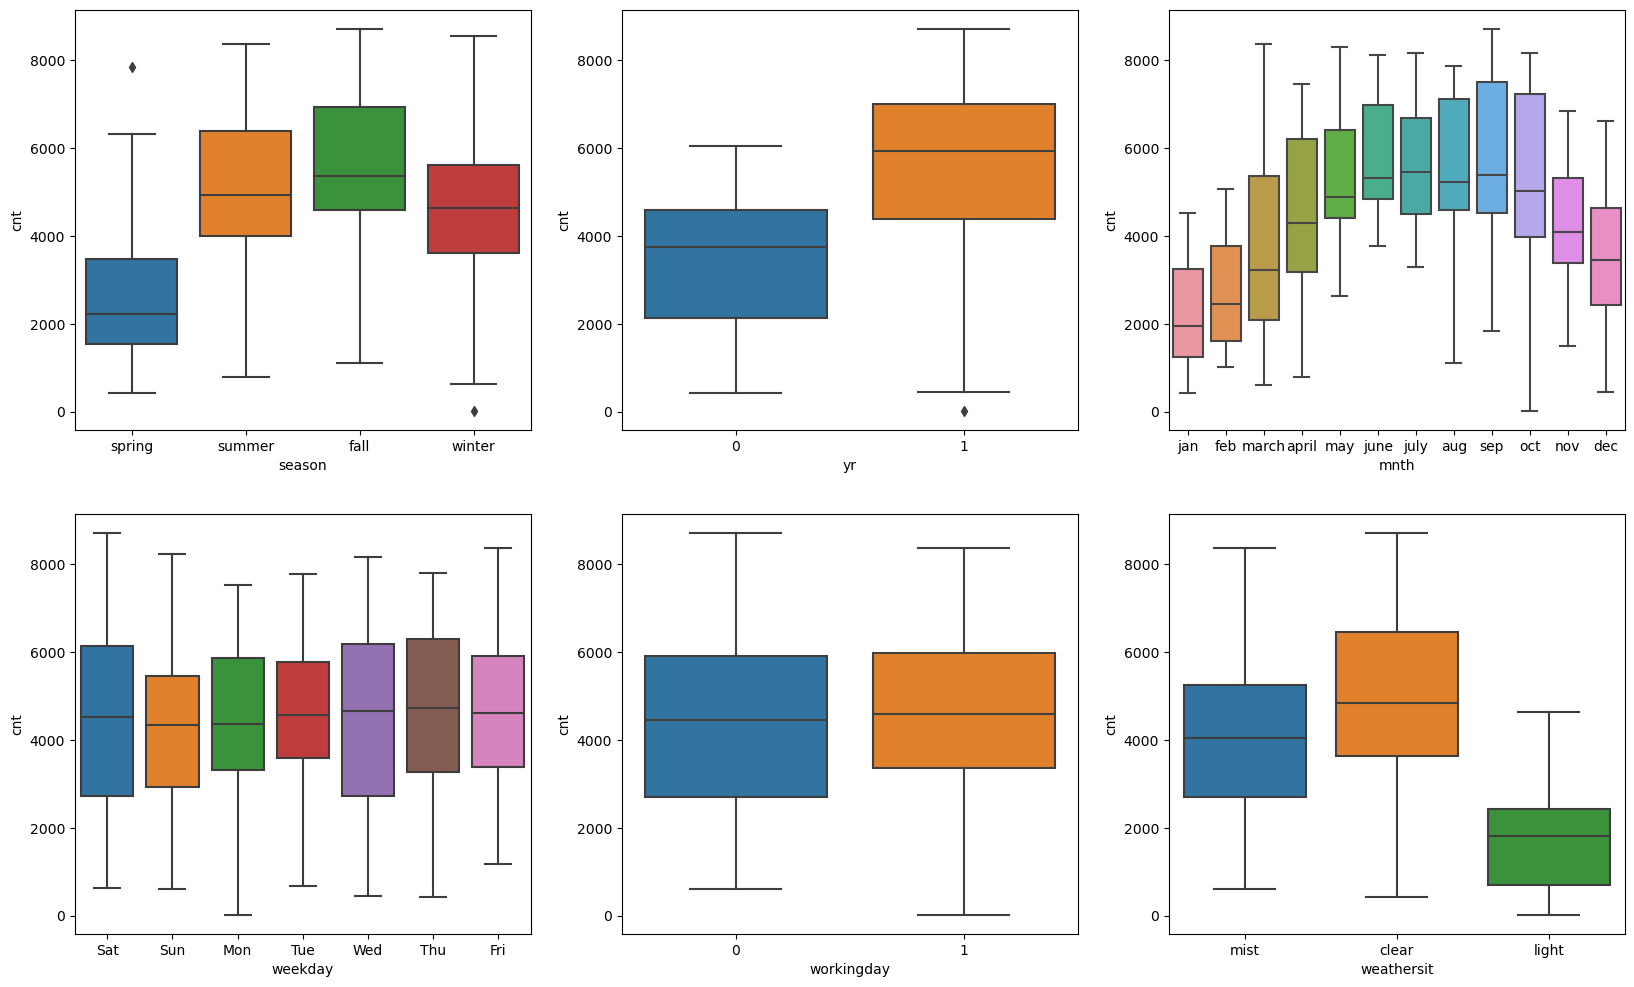

In [25]:
#visualising categorical variables

plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikes)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=bikes)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikes)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=bikes)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=bikes)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bikes)
plt.show()

Inference:
- More no. of bikes are rented in fall and summer **seasons**, and from May till October.
- More no. of bikes were rented in 2019(1) than in 2018(0) **years**.
- Variables like **weekday, holiday** and **workingday** don't reflect any significant pattern. 
- When weather is **clear**, then more bikes are rented.

## Step 3: Data Preparation

- Categorical variables **'yr', 'holiday'** and **'workingday'** are already having values as 0 and 1. Hence, creating dummy variables not neccessary
- Categorical variables like **'season', 'mnth', 'weekday', 'weathersit'** are having more that one values, hence lets create dummy variables.

In [26]:
#Creating dummy variables for categorical variables

bikes = pd.get_dummies(data=bikes,columns=["season","mnth","weekday", "weathersit"],drop_first=True, dtype = 'int32')



In [27]:
bikes.columns 

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [28]:
bikes.head() #Now, we have 29 columns

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Inferences:

From above list of columns, we see that we have created:

- 3 dummy variables **'season_spring','season_summer'** and **'season_winter'** for 4 seasons
- 11 dummy variables **'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct'** and **'mnth_Sep'** for 12 months
- 6 dummy variables **'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue'** and **'weekday_Wed'** for 7 weekdays
- 2 dummy variables **'weathersit_light'** and **'weathersit_mist'** for 4 types of weathers (as there are no rentals in heavy weather, number of dummy variables is one less than 3)

In [29]:
# Checking any null values while creating dummy variables

bikes.isnull().sum()

yr                  0
holiday             0
workingday          0
temp                0
hum                 0
windspeed           0
cnt                 0
season_spring       0
season_summer       0
season_winter       0
mnth_aug            0
mnth_dec            0
mnth_feb            0
mnth_jan            0
mnth_july           0
mnth_june           0
mnth_march          0
mnth_may            0
mnth_nov            0
mnth_oct            0
mnth_sep            0
weekday_Mon         0
weekday_Sat         0
weekday_Sun         0
weekday_Thu         0
weekday_Tue         0
weekday_Wed         0
weathersit_light    0
weathersit_mist     0
dtype: int64

#### Data is prepared for model building

## Step 4: Splitting the Data into Training and Testing Sets

In [30]:
# the first step for regression is performing a train-test split.

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
# checking shape of train set and test set

print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


In [32]:
# Creating a list of numerical columns (not including the ones with Yes-No and Dummy variables)

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [33]:
# Scale the data using MinMax scaling

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [34]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [35]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


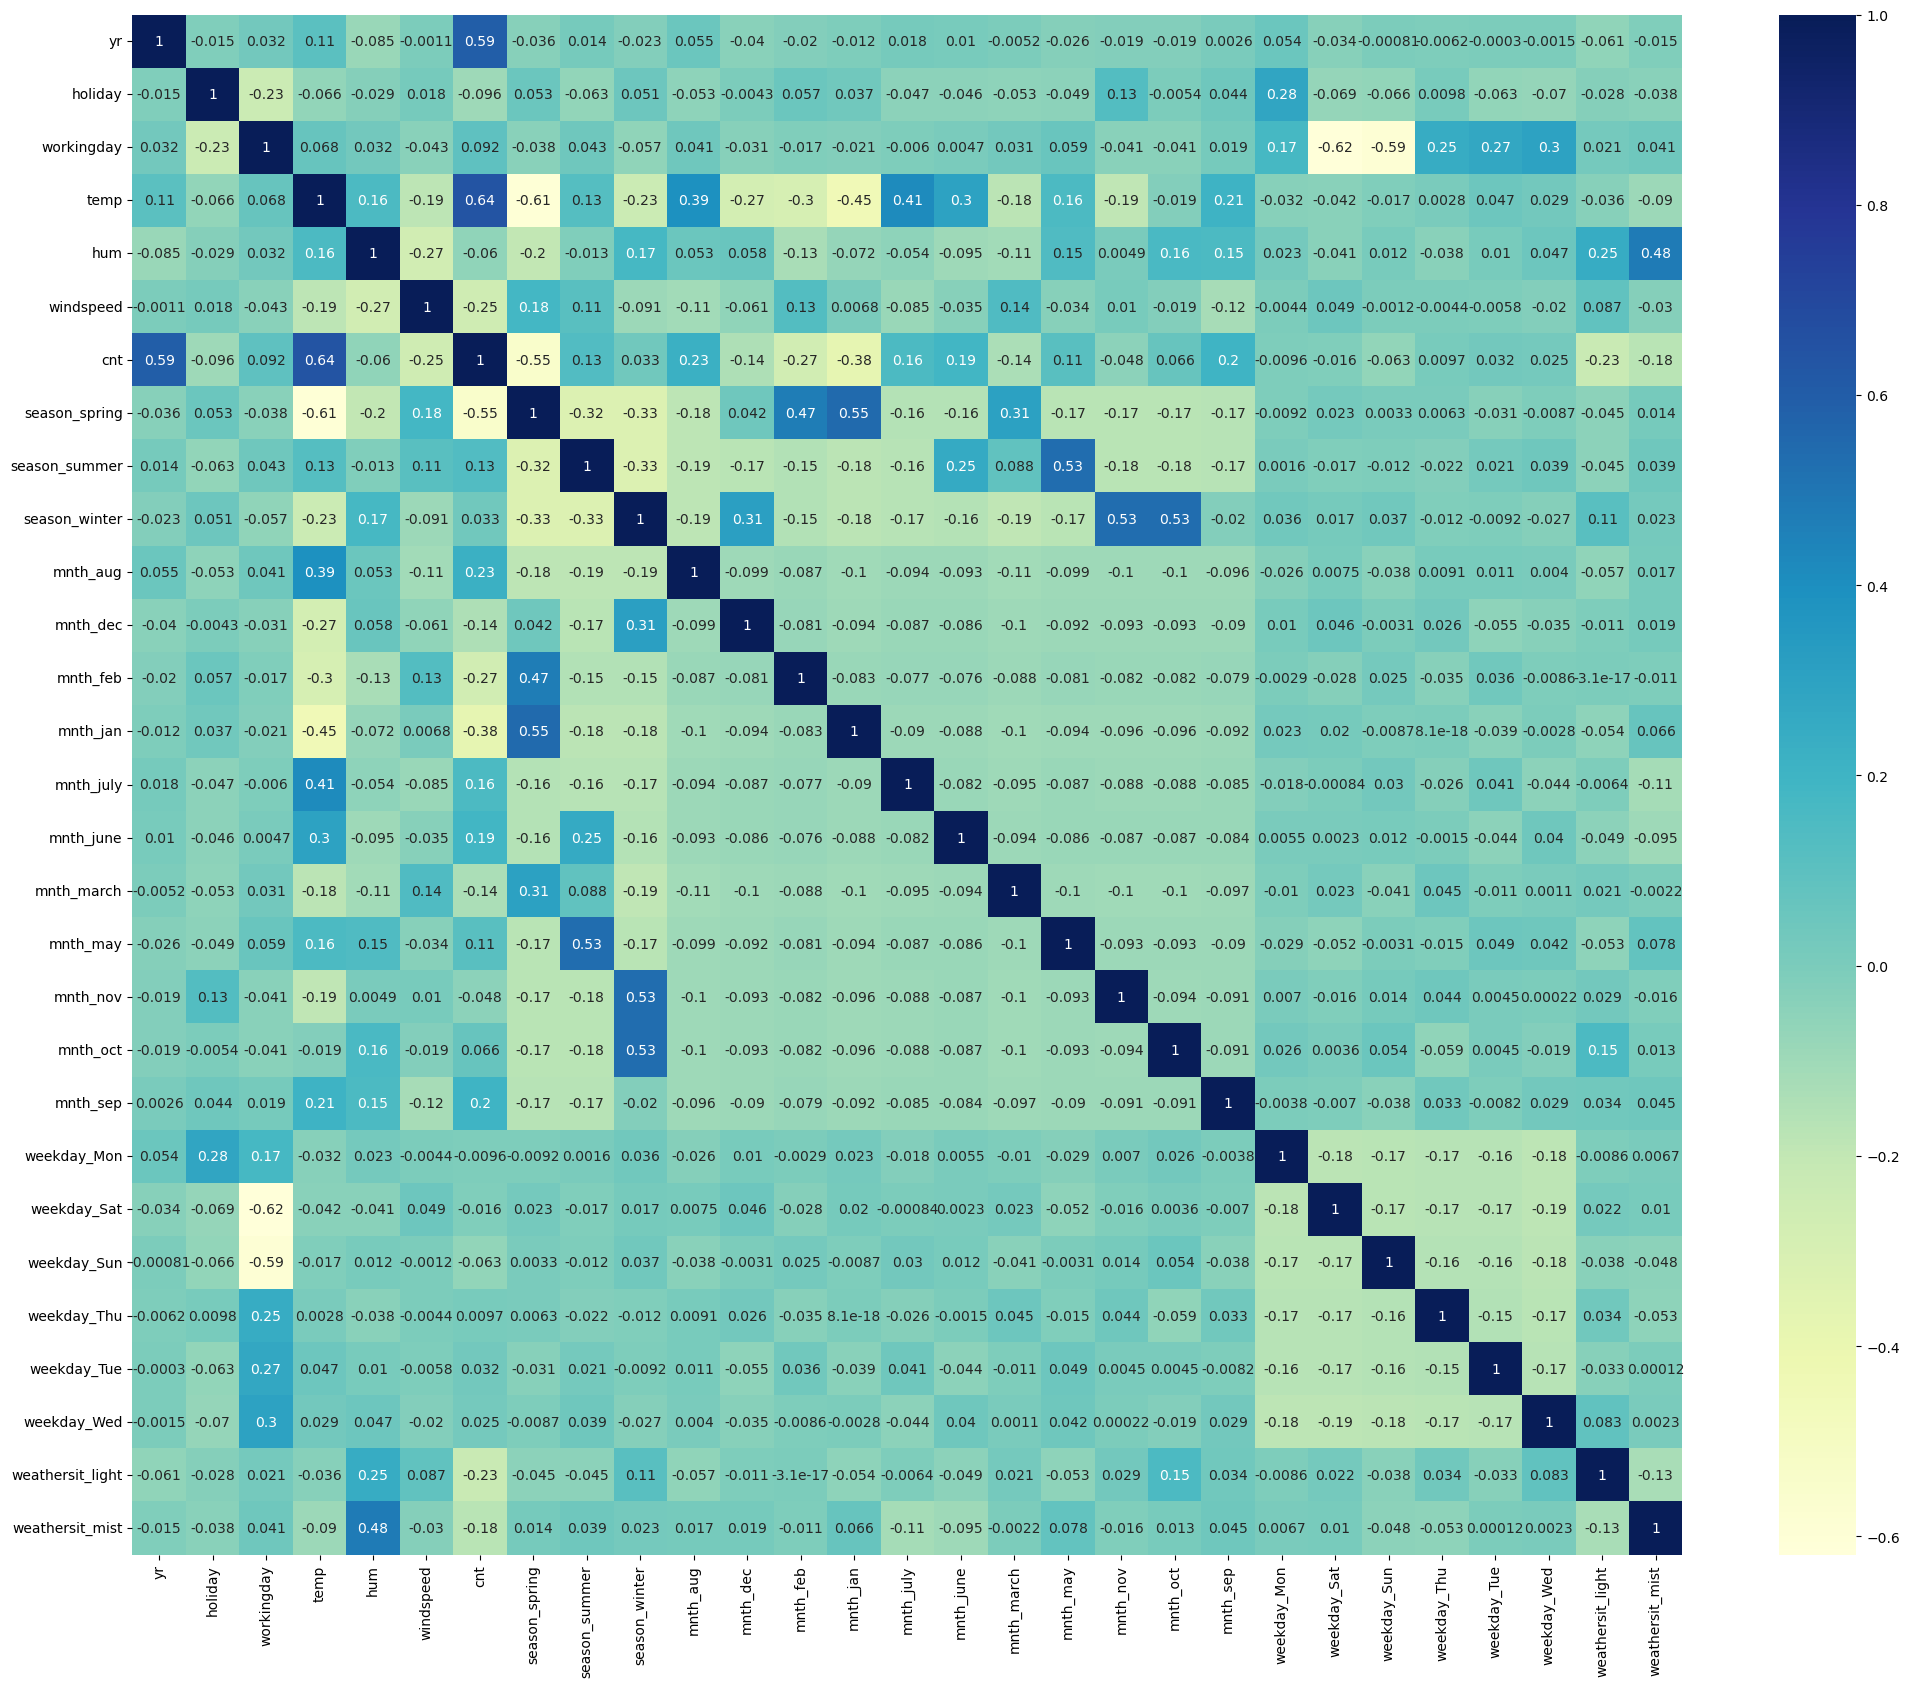

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inference : 

As expected, we see that the target variable **'cnt'** is highly correlated with **'yr', 'temp'** and **'season_spring'**.

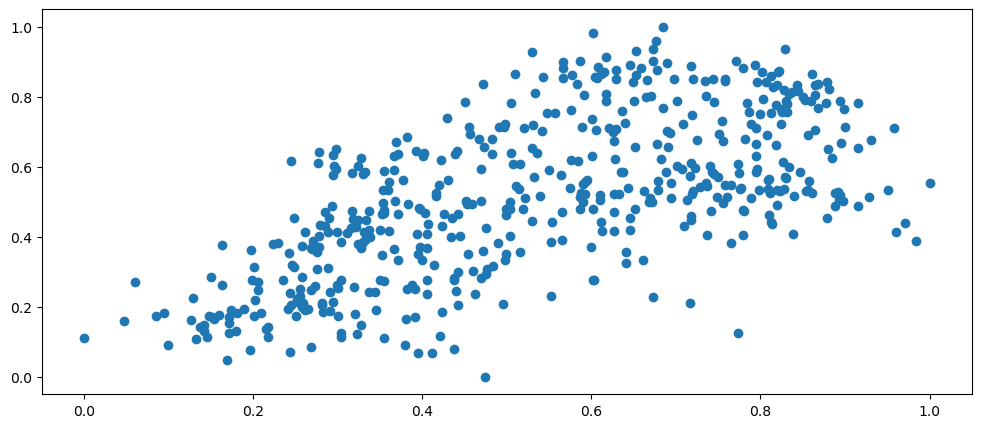

In [37]:
#Let's apply scatterplot between temp and cnt

plt.figure(figsize=(12,5))
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [38]:
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


## Step 5: Building a linear model

### Method 1: Model Selection using Backward Selection

#### Model 1:

In [40]:
# Adding constant
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 1st model
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.74e-182
Time:                        14:50:24   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2451      0.035      6.955      0.000       0.176       0.314
yr                   0.2321      0.008     28.820      0.000       0.216       0.248
holiday              0.0100      0.024      0.415      0.678      -0.037       0.057
workingday           0.0969      0.012      7.905      0.000       0.073       0.121
temp                 0.4506      0.046      9.734      0.000       0.360       0.542
hum                 -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed           -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter        0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july           -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_june           -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_march           0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may             0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct             0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep             0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon         -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat          0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun          0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thu         -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue         -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed         -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_light    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_mist     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. N

In [41]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,workingday,85.58
21,weekday_Sat,19.72
22,weekday_Sun,18.35
6,season_spring,10.79
8,season_winter,9.50
7,season_summer,8.29
3,temp,7.12
17,mnth_nov,6.80
18,mnth_oct,6.59
9,mnth_aug,6.43


Inference:
- R-squared value of 0.851
- The variable workingday has very high VIF (85.58)
- Lets drop workingday variable

#### Model 2

In [42]:
# Dropping 'working day' variable and build model 2

X = X_train.drop('workingday', axis=1)

In [43]:
X_train_lm = sm.add_constant(X)

lr2 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 2nd model
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          8.74e-182
Time:                        14:50:24   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3420      0.044      7.767      0.000       0.255       0.428
yr                   0.2321      0.008     28.820      0.000       0.216       0.248
holiday             -0.0869      0.027     -3.269      0.001      -0.139      -0.035
temp                 0.4506      0.046      9.734      0.000       0.360       0.542
hum                 -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed           -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring       -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer        0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter        0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug             0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec            -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb            -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan            -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july           -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_june           -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_march           0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may             0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov            -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct             0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep             0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon         -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat         -0.0005      0.015     -0.033      0.974      -0.030       0.029
weekday_Sun         -0.0550      0.015     -3.607      0.000      -0.085      -0.025
weekday_Thu         -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue         -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed         -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_light    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_mist     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                         35.2
=====================================================

In [44]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
3,hum,38.19
2,temp,37.11
5,season_spring,11.81
7,season_winter,11.77
6,season_summer,6.89
17,mnth_oct,6.40
16,mnth_nov,6.12
8,mnth_aug,5.87
12,mnth_july,5.26
11,mnth_jan,5.22


Inference : 

 - R-Squared remains same
- The next variable with high VIF (11.81) and also having a high p-value (0.109) is **season_spring**.
- Lets drop **season_spring** and build new model

#### Model 3:

In [45]:
#Dropping 'season_spring' variable and build model 3.

X = X.drop('season_spring', axis=1)

In [46]:
X_train_lm = sm.add_constant(X)

lr3 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 3rd model
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.99e-182
Time:                        14:50:24   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3127      0.040      7.789      0.000       0.234       0.392
yr                   0.2318      0.008     28.742      0.000       0.216       0.248
holiday             -0.0879      0.027     -3.303      0.001      -0.140      -0.036
temp                 0.4598      0.046      9.993      0.000       0.369       0.550
hum                 -0.1537      0.039     -3.992      0.000      -0.229      -0.078
windspeed           -0.1897      0.026     -7.396      0.000      -0.240      -0.139
season_summer        0.0663      0.020      3.345      0.001       0.027       0.105
season_winter        0.1328      0.022      5.941      0.000       0.089       0.177
mnth_aug             0.0389      0.030      1.292      0.197      -0.020       0.098
mnth_dec            -0.0501      0.034     -1.496      0.135      -0.116       0.016
mnth_feb            -0.0510      0.031     -1.657      0.098      -0.112       0.009
mnth_jan            -0.0810      0.032     -2.563      0.011      -0.143      -0.019
mnth_july           -0.0165      0.032     -0.518      0.605      -0.079       0.046
mnth_june            0.0044      0.025      0.177      0.859      -0.044       0.053
mnth_march          -0.0115      0.023     -0.495      0.621      -0.057       0.034
mnth_may             0.0223      0.021      1.064      0.288      -0.019       0.064
mnth_nov            -0.0405      0.036     -1.112      0.267      -0.112       0.031
mnth_oct             0.0076      0.036      0.213      0.831      -0.063       0.078
mnth_sep             0.1005      0.030      3.390      0.001       0.042       0.159
weekday_Mon         -0.0204      0.015     -1.332      0.183      -0.051       0.010
weekday_Sat         -0.0013      0.015     -0.090      0.928      -0.031       0.028
weekday_Sun         -0.0555      0.015     -3.630      0.000      -0.085      -0.025
weekday_Thu         -0.0089      0.016     -0.570      0.569      -0.039       0.022
weekday_Tue         -0.0189      0.016     -1.215      0.225      -0.049       0.012
weekday_Wed         -0.0058      0.015     -0.392      0.695      -0.035       0.023
weathersit_light    -0.2546      0.026     -9.677      0.000      -0.306      -0.203
weathersit_mist     -0.0605      0.010     -5.793      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       81.640   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.223
Skew:                          -0.785   Prob(JB):                     5.56e-49
Kurtosis:                       5.827   Cond. No.                         34.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

In [47]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,36.83
3,hum,36.59
6,season_winter,8.09
16,mnth_oct,6.24
15,mnth_nov,5.92
7,mnth_aug,5.20
4,windspeed,4.79
5,season_summer,4.74
11,mnth_july,4.73
8,mnth_dec,4.38


Inference:
- The next variable with highest VIF (6.24) and also having a high p-value(0.831) is **mnth_oct**.
- Lets drop **mnth_oct** and build another model

#### Model 4 :

In [48]:
# Dropping variable 'mnth_Oct' and build model 4.

X = X.drop('mnth_oct', axis=1)

In [49]:
X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 4th model
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.86e-183
Time:                        14:50:24   Log-Likelihood:                 526.57
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3158      0.037      8.466      0.000       0.243       0.389
yr                   0.2317      0.008     28.786      0.000       0.216       0.248
holiday             -0.0876      0.027     -3.299      0.001      -0.140      -0.035
temp                 0.4594      0.046     10.001      0.000       0.369       0.550
hum                 -0.1527      0.038     -3.999      0.000      -0.228      -0.078
windspeed           -0.1897      0.026     -7.402      0.000      -0.240      -0.139
season_summer        0.0640      0.016      3.889      0.000       0.032       0.096
season_winter        0.1357      0.018      7.678      0.000       0.101       0.170
mnth_aug             0.0354      0.025      1.404      0.161      -0.014       0.085
mnth_dec            -0.0558      0.020     -2.774      0.006      -0.095      -0.016
mnth_feb            -0.0546      0.026     -2.124      0.034      -0.105      -0.004
mnth_jan            -0.0846      0.027     -3.189      0.002      -0.137      -0.032
mnth_july           -0.0199      0.027     -0.728      0.467      -0.074       0.034
mnth_june            0.0024      0.023      0.105      0.916      -0.043       0.047
mnth_march          -0.0143      0.019     -0.733      0.464      -0.052       0.024
mnth_may             0.0211      0.020      1.046      0.296      -0.019       0.061
mnth_nov            -0.0470      0.019     -2.430      0.015      -0.085      -0.009
mnth_sep             0.0963      0.022      4.385      0.000       0.053       0.139
weekday_Mon         -0.0205      0.015     -1.336      0.182      -0.051       0.010
weekday_Sat         -0.0013      0.015     -0.088      0.930      -0.031       0.028
weekday_Sun         -0.0554      0.015     -3.632      0.000      -0.085      -0.025
weekday_Thu         -0.0088      0.016     -0.569      0.570      -0.039       0.022
weekday_Tue         -0.0189      0.016     -1.219      0.223      -0.049       0.012
weekday_Wed         -0.0058      0.015     -0.392      0.695      -0.035       0.023
weathersit_light    -0.2545      0.026     -9.684      0.000      -0.306      -0.203
weathersit_mist     -0.0606      0.010     -5.809      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       80.949   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.579
Skew:                          -0.780   Prob(JB):                     2.08e-48
Kurtosis:                       5.811   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,35.82
3,hum,33.21
4,windspeed,4.64
6,season_winter,4.51
7,mnth_aug,3.93
5,season_summer,3.72
11,mnth_july,3.71
12,mnth_june,2.54
10,mnth_jan,2.53
16,mnth_sep,2.47


Inference:
- Now, there are no variables with both **high p-value and high VIFs**.
- So, next we look for variables with **high p-value and low VIFs**.
- The next variable with a high p-value(0.930) and low VIF (2.15) is is **weekday_Sat**.
- Lets drop **weekday_Sat** and buiold another model

#### Model 5:

In [51]:
# Dropping variable 'weekday_Sat' and build 5th model

X = X.drop('weekday_Sat', axis=1)

In [52]:
X_train_lm = sm.add_constant(X)

lr5 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 5th model
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.63e-184
Time:                        14:50:25   Log-Likelihood:                 526.56
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3151      0.036      8.651      0.000       0.244       0.387
yr                   0.2317      0.008     28.816      0.000       0.216       0.248
holiday             -0.0876      0.027     -3.302      0.001      -0.140      -0.035
temp                 0.4596      0.046     10.018      0.000       0.369       0.550
hum                 -0.1528      0.038     -4.005      0.000      -0.228      -0.078
windspeed           -0.1898      0.026     -7.418      0.000      -0.240      -0.140
season_summer        0.0639      0.016      3.892      0.000       0.032       0.096
season_winter        0.1356      0.018      7.687      0.000       0.101       0.170
mnth_aug             0.0353      0.025      1.403      0.161      -0.014       0.085
mnth_dec            -0.0559      0.020     -2.778      0.006      -0.095      -0.016
mnth_feb            -0.0546      0.026     -2.126      0.034      -0.105      -0.004
mnth_jan            -0.0847      0.027     -3.194      0.001      -0.137      -0.033
mnth_july           -0.0200      0.027     -0.731      0.465      -0.074       0.034
mnth_june            0.0023      0.023      0.103      0.918      -0.043       0.047
mnth_march          -0.0143      0.019     -0.735      0.462      -0.052       0.024
mnth_may             0.0211      0.020      1.049      0.295      -0.018       0.061
mnth_nov            -0.0470      0.019     -2.433      0.015      -0.085      -0.009
mnth_sep             0.0962      0.022      4.389      0.000       0.053       0.139
weekday_Mon         -0.0198      0.013     -1.524      0.128      -0.045       0.006
weekday_Sun         -0.0547      0.013     -4.257      0.000      -0.080      -0.029
weekday_Thu         -0.0081      0.013     -0.617      0.538      -0.034       0.018
weekday_Tue         -0.0182      0.013     -1.379      0.169      -0.044       0.008
weekday_Wed         -0.0051      0.012     -0.413      0.680      -0.030       0.019
weathersit_light    -0.2546      0.026     -9.703      0.000      -0.306      -0.203
weathersit_mist     -0.0605      0.010     -5.817      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       81.146   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.840
Skew:                          -0.782   Prob(JB):                     1.83e-48
Kurtosis:                       5.811   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,35.56
3,hum,32.67
4,windspeed,4.55
6,season_winter,4.45
7,mnth_aug,3.92
11,mnth_july,3.70
5,season_summer,3.67
12,mnth_june,2.54
16,mnth_sep,2.46
10,mnth_jan,2.45


Inference:
- The next variable with high p-value(0.918) and low VIF(2.54) is **mnth_june**.
- So, now we rebuild our model by dropping **mnth_june**.

#### Model 6:

In [54]:
# Dropping variable 'mnth_june' and build 6th model

X = X.drop('mnth_june', axis=1)

In [55]:
X_train_lm = sm.add_constant(X)

lr6 = sm.OLS(y_train, X_train_lm).fit()

# Check the summary of 5th model
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          2.36e-185
Time:                        14:50:25   Log-Likelihood:                 526.56
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3151      0.036      8.660      0.000       0.244       0.387
yr                   0.2316      0.008     28.981      0.000       0.216       0.247
holiday             -0.0878      0.026     -3.328      0.001      -0.140      -0.036
temp                 0.4620      0.039     11.895      0.000       0.386       0.538
hum                 -0.1533      0.038     -4.062      0.000      -0.227      -0.079
windspeed           -0.1901      0.025     -7.506      0.000      -0.240      -0.140
season_summer        0.0638      0.016      3.896      0.000       0.032       0.096
season_winter        0.1351      0.017      8.079      0.000       0.102       0.168
mnth_aug             0.0338      0.020      1.660      0.098      -0.006       0.074
mnth_dec            -0.0558      0.020     -2.779      0.006      -0.095      -0.016
mnth_feb            -0.0548      0.026     -2.144      0.033      -0.105      -0.005
mnth_jan            -0.0847      0.026     -3.200      0.001      -0.137      -0.033
mnth_july           -0.0216      0.022     -0.989      0.323      -0.065       0.021
mnth_march          -0.0148      0.019     -0.789      0.431      -0.052       0.022
mnth_may             0.0201      0.017      1.151      0.250      -0.014       0.054
mnth_nov            -0.0469      0.019     -2.434      0.015      -0.085      -0.009
mnth_sep             0.0951      0.019      4.968      0.000       0.058       0.133
weekday_Mon         -0.0197      0.013     -1.524      0.128      -0.045       0.006
weekday_Sun         -0.0547      0.013     -4.261      0.000      -0.080      -0.029
weekday_Thu         -0.0081      0.013     -0.619      0.536      -0.034       0.018
weekday_Tue         -0.0182      0.013     -1.386      0.166      -0.044       0.008
weekday_Wed         -0.0051      0.012     -0.413      0.680      -0.029       0.019
weathersit_light    -0.2545      0.026     -9.713      0.000      -0.306      -0.203
weathersit_mist     -0.0605      0.010     -5.826      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       80.950   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.549
Skew:                          -0.781   Prob(JB):                     3.49e-48
Kurtosis:                       5.801   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
3,hum,31.85
2,temp,22.45
4,windspeed,4.45
6,season_winter,3.94
5,season_summer,3.65
7,mnth_aug,2.55
10,mnth_jan,2.45
11,mnth_july,2.37
22,weathersit_mist,2.34
0,yr,2.11


Inferences:
 - We observe that R-squared is remaining the same, 0.852
- Now, if we keep on dropping more variables, it doesn't impact R-squared.
- Hence, lets finalize model no.6 is optimal, which explains 85% variation of the data.

## Step 6: Residual Analysis of the train data

In [57]:
# Predicting on our train set

y_train_pred = lr6.predict(X_train_lm)

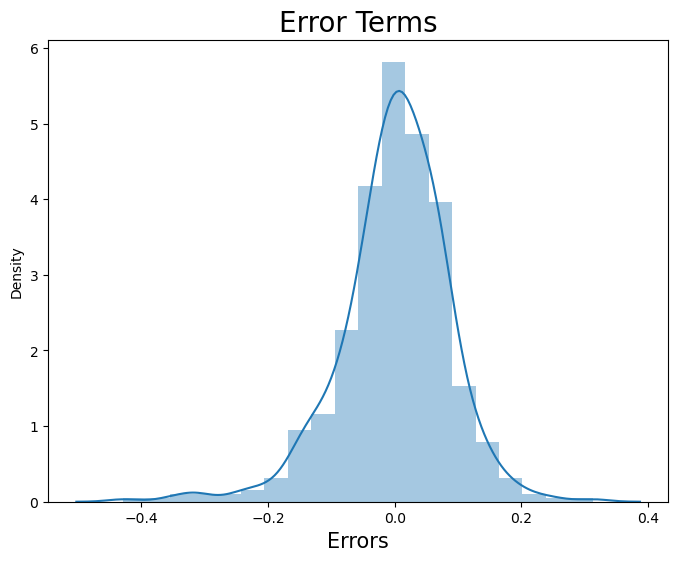

In [58]:
# Plotting histogram of residuals (error terms) to validate assumption 2

plt.figure(figsize=(8,6))
Errors = y_train - y_train_pred
sns.distplot(Errors, bins=20)
plt.title("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=15);

Inferences :

- The above histogram plot shows, that residuals are ***error terms distributed with mean approximately zero**, this validates the MLR assumption no.2.
- It also indeicates that model no.6 is good to make predection on test dataset, and to determine the significant variables to predict the demand for bikes.

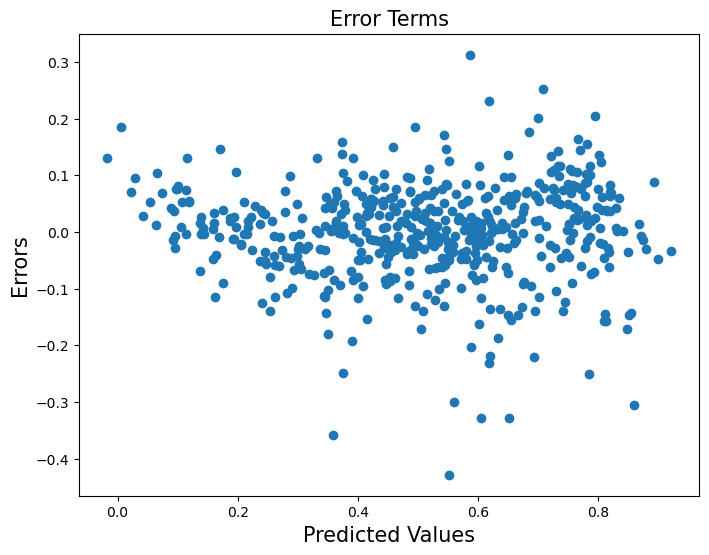

In [59]:
# Plotting scatter plot to validate assumptions 3 & 4

plt.figure(figsize=(8,6))
plt.scatter(y_train_pred, Errors)
plt.title("Error Terms", fontsize=15)
plt.ylabel("Errors", fontsize=15)
plt.xlabel("Predicted Values", fontsize=15);

Inferences :

- The above scatter plot shows, that residuals are **error terms are independent of each other** & **error terms have constant variance (homoscedasticity)**, this validates the MLR assumption no.3 & no.4


## Step 7: Making Predictions Using the Final Model

In [60]:
# Scaling test data using the same columns used while scaling train data

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [61]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_light,weathersit_mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
#Divding test data into X and y

y_test = df_test.pop('cnt')
X_test = df_test

In [63]:
print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [64]:
# Adding constant

X_test_sm = sm.add_constant(X_test)

In [65]:
# Dropping the variables that we dropped from training data

X_test_sm = X_test_sm.drop(['workingday', 'season_spring', 'mnth_oct', 'weekday_Sat', 'mnth_june'], axis=1)

In [66]:
# Making predictions using 6th model

y_test_pred = lr6.predict(X_test_sm)

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

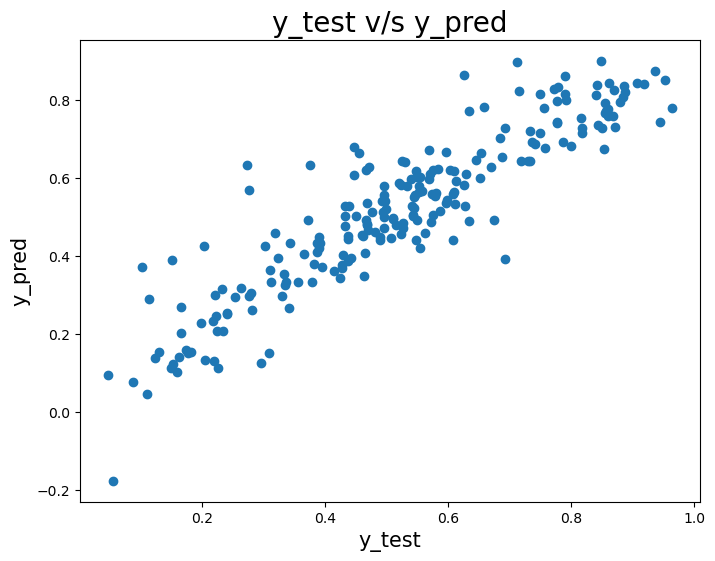

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("y_test v/s y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=15)
plt.ylabel("y_pred", fontsize=15);

In [68]:
# Evaluate the model

r2 = r2_score(y_test, y_test_pred)
r2

0.8203295398802868

In [69]:
# Calculating adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p = X_test.shape[1]    # No. of columns of test data

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7938517878626448

Inferences after applying model on test data:

- We observerd an **R-squared of 0.852** and an **adjusted R-squared of 0.846** in the model no.6
- The same model gives an **R-squared of 0.820** on test set and **adjusted R-squared of 0.793**.
- Model works as same as on training as well as test data. Hence, model is **not underfitting or overfitting**.
- The value of probability of **F-statistic is 2.36e-185** which is close to zero.
- **Therefore, we observed that prediction model is significant.**



### Method 2:  Model Selection using RFE

In [70]:
# Instantiating a class for LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
# Running RFE with the output number of the variable equal to 10

rfe = RFE(lm, step = 10)
rfe = rfe.fit(X_train, y_train)


In [72]:
# Look at columns and their ranking given by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 3),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 3),
 ('mnth_march', False, 3),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 3),
 ('mnth_sep', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 3),
 ('weathersit_light', True, 1),
 ('weathersit_mist', True, 1)]

In [73]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july', 'mnth_sep',
       'weekday_Sat', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_june',
       'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

#### Building model using statsmodel

In [75]:
# Create train set by only the columns selected by RFE

X_train_rfe = X_train[col]

# Add constant
X_train_rfe = sm.add_constant(X_train_rfe)

lm1 = sm.OLS(y_train, X_train_rfe).fit()

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          6.70e-188
Time:                        14:50:28   Log-Likelihood:                 508.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     495   BIC:                            -924.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3493      0.032     11.051      0.000       0.287       0.411
yr                   0.2317      0.008     28.388      0.000       0.216       0.248
holiday             -0.0957      0.026     -3.719      0.000      -0.146      -0.045
temp                 0.4517      0.032     13.906      0.000       0.388       0.516
hum                 -0.1444      0.038     -3.801      0.000      -0.219      -0.070
windspeed           -0.1822      0.026     -7.038      0.000      -0.233      -0.131
season_spring       -0.0972      0.015     -6.301      0.000      -0.128      -0.067
season_winter        0.0563      0.013      4.447      0.000       0.031       0.081
mnth_dec            -0.0295      0.016     -1.832      0.068      -0.061       0.002
mnth_jan            -0.0462      0.018     -2.566      0.011      -0.082      -0.011
mnth_july           -0.0750      0.017     -4.344      0.000      -0.109      -0.041
mnth_sep             0.0603      0.016      3.880      0.000       0.030       0.091
weekday_Sat          0.0185      0.011      1.654      0.099      -0.003       0.040
weathersit_light    -0.2510      0.027     -9.453      0.000      -0.303      -0.199
weathersit_mist     -0.0572      0.011     -5.419      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       66.849   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.861
Skew:                          -0.695   Prob(JB):                     1.43e-34
Kurtosis:                       5.324   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Checking VIFs

X_train_new = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
3,hum,24.27
2,temp,16.55
4,windspeed,4.07
5,season_spring,2.94
13,weathersit_mist,2.25
6,season_winter,2.22
0,yr,2.07
8,mnth_jan,1.73
9,mnth_july,1.41
7,mnth_dec,1.35


In [77]:
# Now we first drop the variable 'hum' as it has the highest VIF (24.27)

X = X.drop(['hum'], axis=1)

# Add constant
X_train_lm = sm.add_constant(X)

lm2 = sm.OLS(y_train, X_train_lm).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 09 Apr 2024   Prob (F-statistic):          5.60e-186
Time:                        14:50:28   Log-Likelihood:                 501.54
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     496   BIC:                            -915.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2741      0.025     10.969      0.000       0.225       0.323
yr                   0.2352      0.008     28.620      0.000       0.219       0.251
holiday             -0.0960      0.026     -3.680      0.000      -0.147      -0.045
temp                 0.4206      0.032     13.202      0.000       0.358       0.483
windspeed           -0.1565      0.025     -6.179      0.000      -0.206      -0.107
season_spring       -0.0997      0.016     -6.385      0.000      -0.130      -0.069
season_winter        0.0480      0.013      3.796      0.000       0.023       0.073
mnth_dec            -0.0352      0.016     -2.162      0.031      -0.067      -0.003
mnth_jan            -0.0512      0.018     -2.809      0.005      -0.087      -0.015
mnth_july           -0.0676      0.017     -3.887      0.000      -0.102      -0.033
mnth_sep             0.0572      0.016      3.634      0.000       0.026       0.088
weekday_Sat          0.0208      0.011      1.838      0.067      -0.001       0.043
weathersit_light    -0.2910      0.025    -11.786      0.000      -0.340      -0.243
weathersit_mist     -0.0804      0.009     -9.179      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       70.003   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.673
Skew:                          -0.727   Prob(JB):                     4.74e-36
Kurtosis:                       5.354   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Checking VIFs again

X_train_new = X_train_lm.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif 

,Features,VIF
2,temp,4.67
3,windspeed,4.04
4,season_spring,2.37
0,yr,2.07
5,season_winter,1.64
7,mnth_jan,1.64
12,weathersit_mist,1.53
8,mnth_july,1.36
6,mnth_dec,1.29
9,mnth_sep,1.20


Inferences :

- After dropping 'hum', VIF values for all variables lesser than 5, therefore **all coefficients are significant**.
- Lets do resudial analysis with model 2 i.e 'lm2', which gives **R-Squared of 0.837**. 


#### Residual Analysis

In [79]:
# Predicting on our train set

y_train_pred = lm2.predict(X_train_lm)

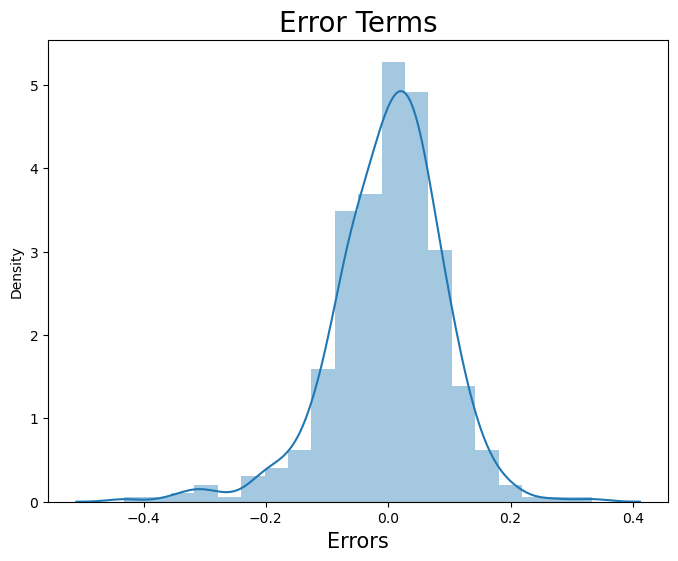

In [80]:
# Plotting histogram of residuals (error terms) to valiate assumption 2

plt.figure(figsize=(8,6))
Errors = y_train - y_train_pred
sns.distplot(Errors, bins=20)
plt.title("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=15);

Inferences :

- The above histogram plot shows, that residuals are **error terms distributed with mean approximately zero**, this validates the MLR assumption no.2.
- It also indeicates that model 2 is good to make predection on test dataset, and to determine the significant variables to predict the demand for bikes.

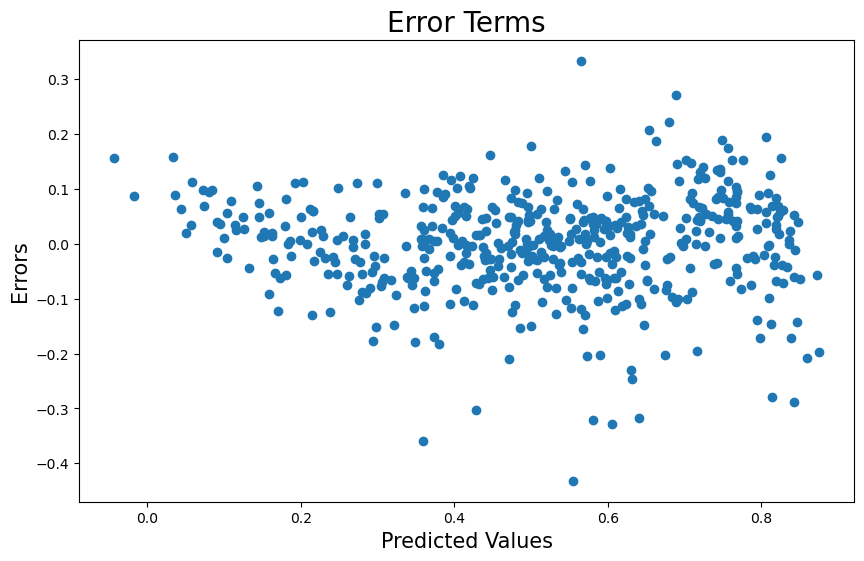

In [81]:
# Plotting scatter plot to validate assumptions 3 & 4

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, Errors)
plt.title("Error Terms", fontsize=20)
plt.ylabel("Errors", fontsize=15)
plt.xlabel("Predicted Values", fontsize=15);

Inferences :

- The above scatter plot shows, that residuals are **error terms are independent of each other** & **error terms have constant variance (homoscedasticity)**, this validates the MLR assumption no.3 & no.4

### Making Predictions Using the Final Model

In [82]:
# Check the dimensions of test data 

print(X_test.shape)
print(y_test.shape)

(219, 28)
(219,)


In [83]:
# Selecting all the variables/columns that were selected while builiding model on training set
X_test_new = X_test[X_train_new.columns]

# Add constant
X_test_new = sm.add_constant(X_test_new)

In [84]:
# Making predictions

y_test_pred = lm2.predict(X_test_new)

### Model Evaluation

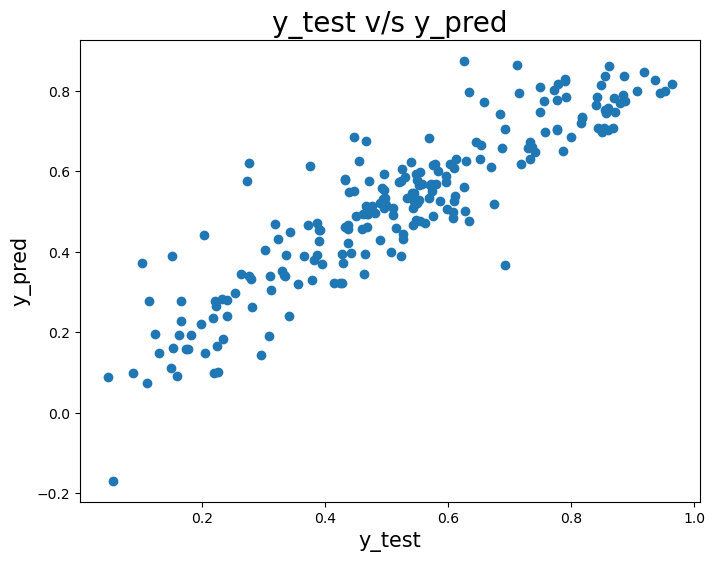

In [85]:
# Plot scatter plot between y_test and y_test_pred

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("y_test v/s y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=15)
plt.ylabel("y_pred", fontsize=15);

In [86]:
# Evaluate the model: First calculate R-squared

r2 = r2_score(y_test, y_test_pred)
r2

0.8079234563188584

In [87]:
# Next calculate adjusted R-squared using formula: Adj R^2 = (1−(1−R^2)∗(n−1)/(n−p−1))

n = X_test.shape[0]    # No. of rows of test data
p = X_test.shape[1]    # No. of columns of test data

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.7796174393553218

Inferences using RFE:

- We observerd an **R-squared of 0.837** and an **adjusted R-squared of 0.833**.
- The same model gives an **R-squared of 0.807** on test set and **adjusted R-squared of 0.779**.
- Model works as same as on training as well as test data. Hence, model is **not underfitting or overfitting**.
- The value of probability of **F-statistic is 5.60e-186** which is close to zero.
- Therefore, we observed that prediction model is significant using RFE as well.

## Summary

1. Models built using both **Backward Selection** and **RFE** methods produced alomst similar results and hence, final modules used are very significant.
2. So, BoomBikes should consider below list of  most significant variables to predict the demand of rental bikes.
- <mark>temp</mark>
- <mark>windspeed</mark>
- <mark>season_spring</mark>
- <mark>yr</mark>